<a href="https://colab.research.google.com/github/whiteydoublee/Colab/blob/main/Ch2.%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/8_MNIST%EC%88%AB%EC%9E%90%EC%9D%B4%EB%AF%B8%EC%A7%80%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
"""
날짜: 2021/10/20
이름: 김예은
내용: MNIST 숫자 이미지 실습하기
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

In [8]:
#데이터불러오기
df_mnist_train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/file/mnist_train.csv')
df_mnist_test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/file/mnist_test.csv')


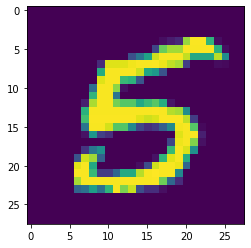

In [9]:
#픽셀 데이터 이미지 출력
img_list = df_mnist_train_data.iloc[20000, 1:].tolist()
img = np.reshape(img_list, [28,28])
plt.imshow(img)


In [10]:
#학습데이터
mnist_train_data = df_mnist_train_data.iloc[:,1:] / 255 # 학습데이터가 크면 학습성능이 저하되므로 0~1사이 실수로 정규화한다..
mnist_train_label = df_mnist_train_data.iloc[:,0]
print(mnist_train_data.shape)

mnist_test_data = df_mnist_test_data.iloc[:,1:] / 255 # 테스트 데이터 
mnist_test_label = df_mnist_test_data.iloc[:,0]
print(mnist_test_data.shape)

(60000, 784)
(10000, 784)


In [11]:
#학습하기
model = svm.SVC()
model.fit(mnist_train_data, mnist_train_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
#테스트
result = model.predict(mnist_test_data)
result

array([7, 2, 1, ..., 4, 5, 6])

In [15]:
#성능평가
score = metrics.accuracy_score(result, mnist_test_label)
score

0.9792

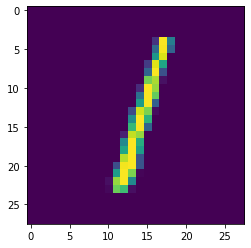

4

In [30]:
#검증
row = 2

img_list = mnist_test_data.iloc[row, :].tolist()
img = np.reshape(img_list, [28,28])
plt.imshow(img)
plt.show()

answer = model.predict(mnist_train_data.iloc[[row], :])
answer[0]